## Complete EDA analysis from beginner to advance


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#data loading 
df=pd.read_csv(".\data\googleplaystore.csv")

In [3]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up


In [4]:
# set option for maximum rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
print(f'The number of rows  is {df.shape[0]},and columns is {df.shape[1]}') #df.shape

The number of rows  is 10841,and columns is 13


In [7]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [8]:
df['Size'].isnull().sum(
    
)

0

In [9]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [10]:
#find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [11]:
#find the values having K in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [12]:
#find the values having 'Varies with device' in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [13]:
8830+316+1695


10841

In [14]:
len(df)

10841

In [15]:
#convert the whole size column to bytes
# lets define a function
def convert_size(size):
    if isinstance  (size,str):
        if 'M' in size:
         return float(size.replace('M',''))*1024*1024
    elif 'k'in size:
         return float(size.replace('k',''))*1024
    elif 'Varies with device'in size:
         return np.nan
    else:
         return float(size)

In [16]:
df['Size']=df['Size'].apply(convert_size)


In [17]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [18]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [19]:
# Rename a column name
df.rename(columns={'Size':'Size_in_bytes'},inplace=True)

In [20]:
df['Size_in_bytes'].isnull().sum()

2011

In [21]:
df["Size_in_Mbs"]=df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [22]:
# ##install columns
# 1.remove the + value
# 2 remove ,
# convert the value into integer


In [23]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [24]:
# lets deal with the price column
df['Price']=df["Price"].loc[df["Price"].str.contains('$')].apply(lambda x: x.replace('$',''))

In [25]:
df["Price"].loc[df["Price"].str.contains('\$')].value_counts().sum()

0

In [26]:
df['Price'].loc[df["Price"].str.contains('0') & (~df['Price'].str.contains('\$')) ].value_counts().sum()

10224

In [27]:
df['Price']=df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)

In [28]:
df['Price'].value_counts()

Price
0          10041
0.99         148
2.99         129
1.99          73
4.99          72
3.99          63
1.49          46
5.99          30
2.49          26
9.99          21
6.99          13
399.99        12
14.99         11
4.49           9
29.99          7
24.99          7
3.49           7
7.99           7
5.49           6
19.99          6
11.99          5
6.49           5
12.99          5
8.99           5
10.00          3
16.99          3
1.00           3
2.00           3
13.99          2
8.49           2
17.99          2
1.70           2
3.95           2
79.99          2
7.49           2
9.00           2
10.99          2
39.99          2
33.99          2
1.96           1
19.40          1
4.80           1
3.28           1
4.59           1
15.46          1
3.04           1
4.29           1
2.60           1
2.59           1
3.90           1
154.99         1
4.60           1
28.99          1
2.95           1
2.90           1
1.97           1
200.00         1
89.99          1
2.56    

In [29]:
df['Price']=df['Price'].apply(lambda x: float(x))

In [30]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mbs
count,9367.000000,1.084100e+04,8.830000e+03,1.084100e+04,10841.000000,8830.000000
mean,4.191513,4.441119e+05,2.335007e+07,1.546291e+07,1.027273,22.268358
std,0.515735,2.927629e+06,2.372753e+07,8.502557e+07,15.948971,22.628339
min,1.000000,0.000000e+00,1.048576e+06,0.000000e+00,0.000000,1.000000
25%,4.000000,3.800000e+01,5.662310e+06,1.000000e+03,0.000000,5.400000
50%,4.300000,2.094000e+03,1.468006e+07,1.000000e+05,0.000000,14.000000
75%,4.500000,5.476800e+04,3.250586e+07,5.000000e+06,0.000000,31.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [31]:
# find the missing values
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     2011
Size_in_Mbs       2011
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

<Axes: >

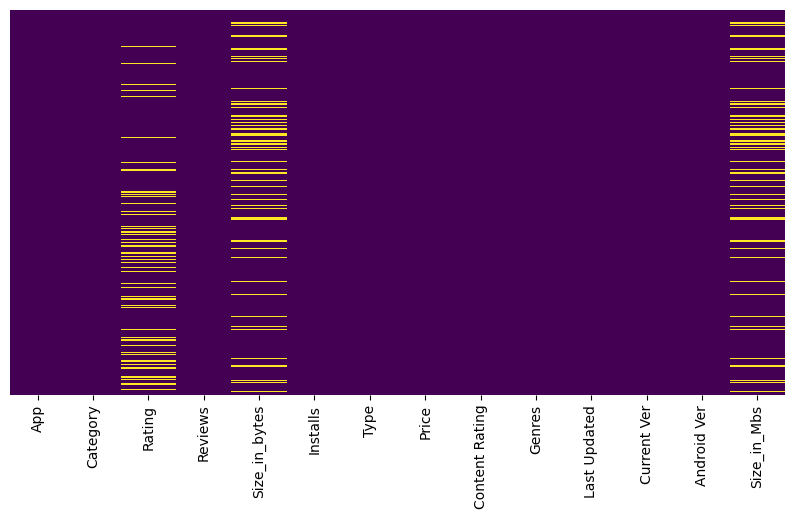

In [32]:
# plot the misisng values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

Text(0.5, 1.0, 'Missing values')

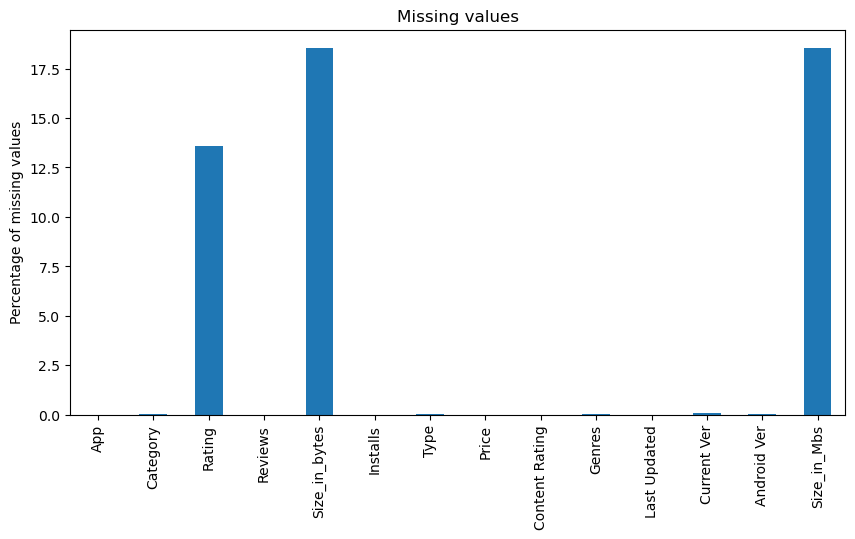

In [33]:
# make figure for missing value
plt.figure(figsize=(10,5))
missing_percentages=df.isnull().sum()/len(df)*100
missing_percentages.plot(kind='bar')
plt.ylabel("Percentage of missing values")
plt.title("Missing values")


<Axes: >

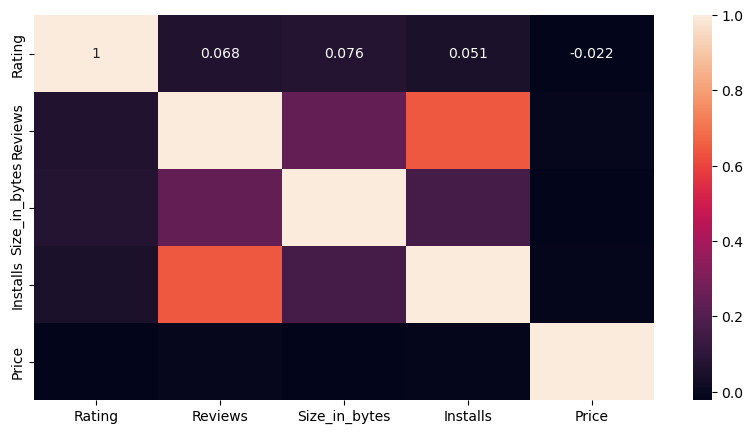

In [35]:
# correlation of missing values
plt.figure(figsize=(10,5))
numeric_variables=['Rating','Reviews','Size_in_bytes','Installs','Price']
sns.heatmap(df[numeric_variables].corr(),annot=True)

In [36]:
corr=correlation_m
numeric_variables=['Rating','Reviews','Size_in_bytes','Installs','Price'].corr()

AttributeError: 'list' object has no attribute 'corr'

In [38]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     2011
Size_in_Mbs       2011
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
App                  0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [40]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs'],
      dtype='object')

In [45]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [51]:
# lets create another column of install category
bins=[-1,0,1000,10000,100000,1000000,10000000,100000000]
labels=['no','very_low','low','medium','high','very_high','extremely_high']
df['Installs'] = pd.cut(df['Installs'],bins=bins,labels=labels)

In [52]:
df['Installs'].value_counts()

Installs
very_low          2697
high              2118
very_high         2004
medium            1648
low               1531
extremely_high     698
no                  15
Name: count, dtype: int64

In [53]:
# lets rename the column Installs to install category
df.rename(columns={'Installs':'install_category'},inplace=True)

In [54]:
df.groupby('Rating')["install_category"].value_counts()

Rating  install_category
1.0     very_low             16
        no                    0
        low                   0
        medium                0
        high                  0
        very_high             0
        extremely_high        0
1.2     very_low              1
        no                    0
        low                   0
        medium                0
        high                  0
        very_high             0
        extremely_high        0
1.4     very_low              2
        low                   1
        no                    0
        medium                0
        high                  0
        very_high             0
        extremely_high        0
1.5     very_low              3
        no                    0
        low                   0
        medium                0
        high                  0
        very_high             0
        extremely_high        0
1.6     very_low              2
        medium                2
        no     

<Figure size 1000x500 with 0 Axes>

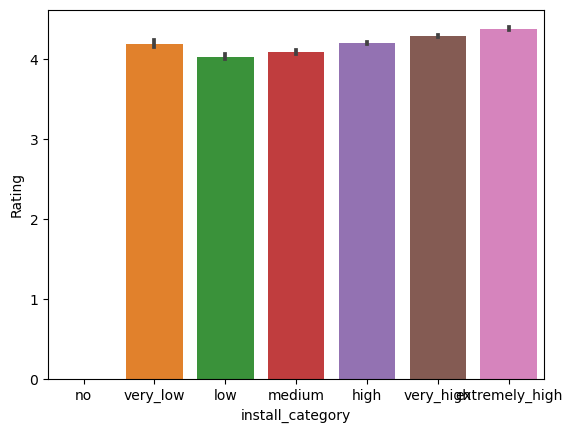

<Figure size 1000x500 with 0 Axes>

In [56]:
# lets plot the relation of install category and rating
sns.barplot(x='install_category',y='Rating',data=df)
plt.figure(figsize=(10,5))

In [47]:
df['Rating'].value_counts().sum()

9367

In [48]:
df['Rating'].isnull().sum() 

1474

In [49]:
df.groupby('Rating')["Installs"].value_counts().sum()

9367

In [50]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mbs'],
      dtype='object')

In [58]:
df.groupby('install_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
install_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
very_low,1361.0,4.197208,0.835538,1.0,3.9,4.4,4.8,5.0
low,1442.0,4.035160,0.604533,1.4,3.8,4.2,4.5,5.0
medium,1617.0,4.093197,0.505468,1.6,3.9,4.2,4.5,4.9
high,2115.0,4.207470,0.376423,1.8,4.0,4.3,4.5,4.9
very_high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
extremely_high,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8


In [59]:
df['Rating'].isnull().sum(
    
)

1474

In [63]:
# lets impute the missing values of rating with mean
df['install_category']=df['install_category'].fillna(df['install_category':'very_low'].mean(4.197208))
# how to impute NaN values in a column

TypeError: cannot do slice indexing on RangeIndex with these indexers [install_category] of type str